In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

## **MNIST**

In [ ]:
# import MNIST dataset from keras
from keras.datasets import mnist
# split dataset into train and test sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


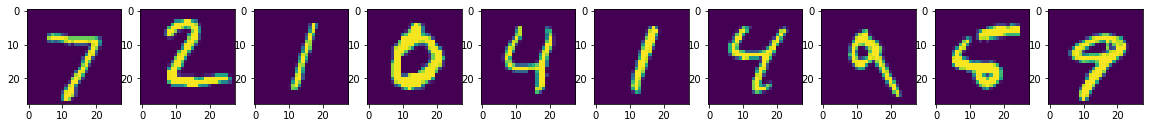

In [ ]:
# plot some images from the set

n=10 #number of images to be plotted
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i])

plt.show()

In [ ]:
# scale images to the [0, 1] range
train_X = train_X.astype('float32') / 255.
test_X = test_X.astype('float32') / 255.

# reshape data to feed the model
train_X = np.reshape(train_X, (len(train_X), 28, 28, 1))  
test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))

# transform labels into categorical data for CNN model
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)


## **CAE**

In [ ]:
# simple CAE (Convolutional Autoencouder)
# import keras layers to build the model

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(28, 28, 1)) 

# construct the encoder part
img = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
img = MaxPooling2D(pool_size = (2, 2), padding='same')(img)

img = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(img)
img = MaxPooling2D(pool_size = (2, 2), padding='same')(img) 

img = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(img)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(img)

# construct the decoder part
img = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
img = UpSampling2D((2, 2))(img)

img = Conv2D(8, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)

img = Conv2D(16, (3, 3), activation='relu')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(img)

# declare the model
cae = Model(input_img, decoded)
cae.summary()
cae.compile(optimizer='adam', loss='binary_crossentropy') 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
# Train the model
cae.fit(train_X, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X, test_X)
               )

Epoch 1/100
469/469 [==============================] - 69s 146ms/step - loss: 0.2250 - val_loss: 0.1504
Epoch 2/100
469/469 [==============================] - 68s 144ms/step - loss: 0.1373 - val_loss: 0.1267
Epoch 3/100
469/469 [==============================] - 67s 143ms/step - loss: 0.1239 - val_loss: 0.1193
Epoch 4/100
469/469 [==============================] - 67s 143ms/step - loss: 0.1179 - val_loss: 0.1145
Epoch 5/100
469/469 [==============================] - 67s 143ms/step - loss: 0.1137 - val_loss: 0.1112
Epoch 6/100
469/469 [==============================] - 67s 143ms/step - loss: 0.1107 - val_loss: 0.1083
Epoch 7/100
469/469 [==============================] - 67s 144ms/step - loss: 0.1086 - val_loss: 0.1065
Epoch 8/100
469/469 [==============================] - 67s 143ms/step - loss: 0.1070 - val_loss: 0.1050
Epoch 9/100
469/469 [==============================] - 68s 144ms/step - loss: 0.1058 - val_loss: 0.1041
Epoch 10/100
469/469 [==============================] - 68s 145m

In [ ]:
reconstructed_imgs = cae.predict(test_X)

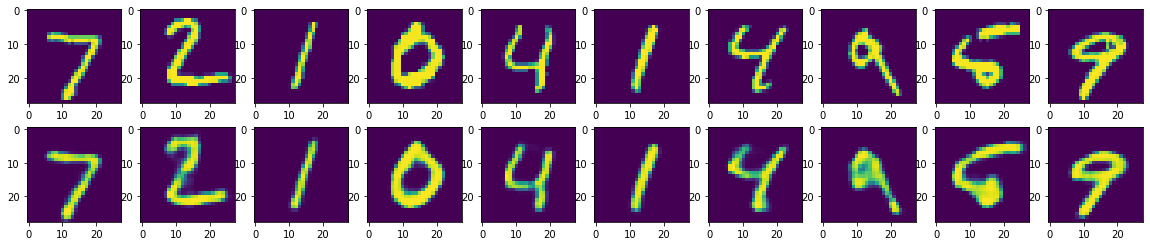

In [ ]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i].reshape(28, 28))

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
plt.show()

### **CNN**

In [ ]:
# simple CNN model 

from tensorflow import keras
from tensorflow.keras import layers

# model contains two convolutional and two maxpooling layers 
cnn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

cnn.summary()

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(train_X, train_y, batch_size=128, epochs=20, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
score = cnn.evaluate(test_X, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# this simple CNN model manages to achieve the accuracy of 0.99 for mnist dataset 

Test loss: 0.029604105278849602
Test accuracy: 0.9908999800682068


## **Denoising with CEA**

In [ ]:
# creating noisy data
noise_var  = 0.1 

train_X_noisy = train_X + noise_var * np.random.normal(0.0, 1.0, size = train_X.shape)
test_X_noisy  = test_X + noise_var * np.random.normal(0.0, 1.0, size = test_X.shape)

# keeping values between 0 and 1
train_X_noisy = np.clip(train_X_noisy, 0.0, 1.0)
test_X_noisy  = np.clip(test_X_noisy, 0.0, 1.0)

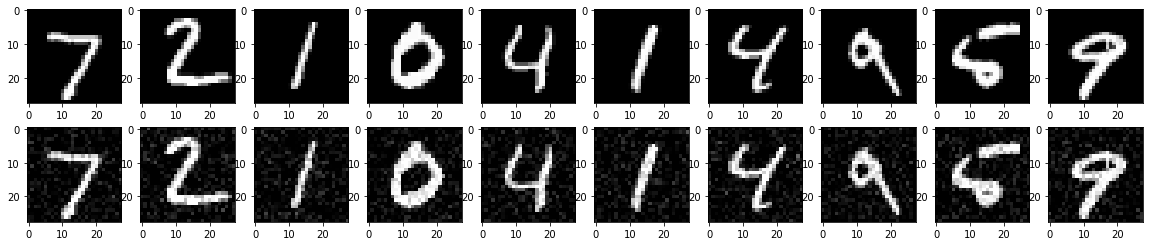

In [ ]:
n = 10 # number of images to be plotted

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.gray()
    plt.imshow(test_X[i].reshape(28, 28))

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(test_X_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

In [ ]:
# simple CAE (Convolutional Autoencouder)
# import keras layers to build the model

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, GaussianNoise
from keras.models import Model

input_img = Input(shape=(28, 28, 1)) 

# construct the encoder part
img = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
img = MaxPooling2D(pool_size = (2, 2), padding='same')(img)

img = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(img)
img = MaxPooling2D(pool_size = (2, 2), padding='same')(img) 

img = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(img)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(img)

# adding noise 
GaussianNoise(stddev=0.01)(encoded)

# construct the decoder part
img = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
img = UpSampling2D((2, 2))(img)

img = Conv2D(8, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)

img = Conv2D(16, (3, 3), activation='relu')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(img)

# declare the model
cae = Model(input_img, decoded)
cae.summary()
cae.compile(optimizer='adam', loss='binary_crossentropy') 




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           584 

In [ ]:
cae.fit(train_X_noisy, train_X,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(test_X_noisy, test_X)
               )

Epoch 1/100
469/469 [==============================] - 7s 13ms/step - loss: 0.2159 - val_loss: 0.1508
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1422 - val_loss: 0.1324
Epoch 3/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1286 - val_loss: 0.1235
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1220 - val_loss: 0.1191
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1174 - val_loss: 0.1146
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1139 - val_loss: 0.1110
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1115 - val_loss: 0.1090
Epoch 8/100
469/469 [==============================] - 5s 12ms/step - loss: 0.1091 - val_loss: 0.1070
Epoch 9/100
469/469 [==============================] - 6s 12ms/step - loss: 0.1072 - val_loss: 0.1054
Epoch 10/100
469/469 [==============================] - 6s 12ms/step - loss: 0.105

In [ ]:
denoised = cae.predict(test_X_noisy)

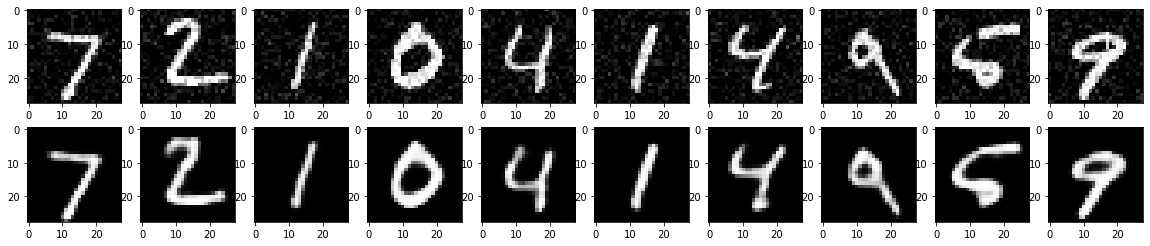

In [ ]:
n = 10 # number of images to be plotted

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.gray()
    plt.imshow(test_X_noisy[i].reshape(28, 28))

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(denoised[i].reshape(28, 28))
    plt.gray()
plt.show()

# as we see, the denoised images are quise close to the original images

In [74]:
# calculate error and chose the worst results, ones with highest variance
from sklearn.metrics import mean_squared_error
error = []
for i in range(denoised.shape[0]):
  mse = mean_squared_error(test_X_noisy.squeeze(axis=3)[i], denoised.squeeze(axis=3)[i])
  error.append(mse)

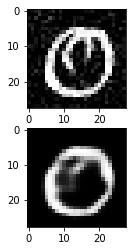

In [75]:
# worst denoised image
ax = plt.subplot(2, 1, 1)
plt.gray()
plt.imshow(test_X_noisy[error.index(max(error))].reshape(28, 28))

ax = plt.subplot(2, 1, 2)
plt.imshow(denoised[error.index(max(error))].reshape(28, 28))
plt.gray()

# even the worst denoised image seems to be recovered quite well